# Movie Megadata

In [30]:
#importing necessary information
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [31]:
#loading csv files
movies_md=pd.read_csv("movies_md.csv")
tmdb_df=pd.read_csv('tmdb_data')

In [32]:
#merging the two dataframes.
movie_md=pd.merge(tmdb_df,movies_md, on='imdb_id', how='left' ) #tmdb = x, movies = y

In [33]:
movie_md.head()

,Unnamed: 0,popularity_x,vote_count_x,video,id_x,adult,original_language,original_title,genre_ids,title_x,vote_average_x,...,overview_y,release_date_y,runtime_y,popularity_y,vote_count_y,vote_average_y,budget_y,revenue_y,production_companies,production_countries,spoken_languages
0,0,39.595,14593,False,299534,False,en,Avengers: Endgame,"[28, 12, 878]",Avengers: Endgame,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,34.817,21845,False,19995,False,en,Avatar,"[28, 12, 14, 878]",Avatar,7.4,...,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,185.070892,12114.0,7.2,237000000.0,2.787965e+09,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,2,33.986,17508,False,597,False,en,Titanic,"[18, 10749]",Titanic,7.8,...,"84 years later, a 101-year-old woman named Ros...",1997-11-18,194.0,26.889070,7770.0,7.5,200000000.0,1.845034e+09,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
3,3,35.921,14810,False,140607,False,en,Star Wars: The Force Awakens,"[28, 12, 14, 878]",Star Wars: The Force Awakens,7.4,...,Thirty years after defeating the Galactic Empi...,2015-12-15,136.0,31.626013,7993.0,7.5,245000000.0,2.068224e+09,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,4,93.400,19314,False,299536,False,en,Avengers: Infinity War,"[28, 12, 878]",Avengers: Infinity War,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
def columnmerge(column_x,column_y,dataframe):
    """
    columnmerge(string, string, db)

    Column merge takes two columns and compares its values and concatenates any missing values to the
    first column provided. This function takes in string or int columns. Once columns are merged it deletes the seccond 
    column and renames the first column.


    """
    
    name=''
    name1=''
    if type(dataframe[column_x][0])== str or type(dataframe[column_y][0])== str: #veryfy if we will be working with strings
                                                                                #or int
        for i in range(len(dataframe[column_x])):
            hold=None
            if dataframe[column_x][i]!= dataframe[column_x][i]:
                hold=dataframe[column_y][i]
                dataframe[column_x][i]=hold
        dataframe.drop(column_y,axis=1,inplace=True)
        name1=column_x
        name= name1.strip('_x')
        dataframe.rename(columns={name1: name},inplace=True)    
    else:
        for i in range(len(column_x)):
            hold=None
            if dataframe[column_x][i]<=dataframe[column_y][i]:
                hold=dataframe[column_y][i]
                dataframe[column_x][i]=hold
        dataframe.drop(column_y,axis=1,inplace=True)
        name1=column_x
        name= name1.strip('_x')
        dataframe.rename(columns={name1: name},inplace=True)

In [35]:
# merge duplicate columns with the missing values of each.
columnmerge('id_x','id_y',movie_md)
columnmerge('title_x','title_y',movie_md)
columnmerge('overview_x','overview_y',movie_md)
columnmerge('budget_x','budget_y',movie_md)
columnmerge('revenue_x','revenue_y',movie_md)
columnmerge('runtime_x','runtime_y',movie_md)
columnmerge('release_date_x','release_date_y',movie_md)

/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
#separating year and month of release
movie_md['release_year'] = movie_md['release_date'].apply(lambda x: int(x[0:4]))
movie_md['release_month'] = movie_md['release_date'].apply(lambda x: int(x[5:7]))

In [37]:
#removing empty and redundant columns.
movie_md.drop(['Unnamed: 0','video','adult','index','release_date'],axis=1,inplace=True)
movie_md.columns

Index(['popularity_x', 'vote_count_x', 'id', 'original_language',
       'original_title', 'genre_ids', 'title', 'vote_average_x', 'overview',
       'budget', 'imdb_id', 'revenue', 'runtime', 'year', 'genres',
       'popularity_y', 'vote_count_y', 'vote_average_y',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'release_month'],
      dtype='object')

In [38]:
#re arranging columns with a more easy to read order.
new_col=[ 'id', 'title', 'imdb_id','genres','overview', 'budget', 'release_year','release_month','popularity_x', 'vote_count_x','vote_average_x','original_language', 'original_title','revenue', 'runtime', 'year', 'genre_ids','popularity_y', 'vote_count_y', 'vote_average_y','production_companies', 'production_countries', 'spoken_languages']
movie_md=movie_md[new_col]
pd.set_option('display.max_columns', len(new_col))
movie_md=movie_md.rename(columns={"popularity_x": "engagement", "vote_count_x": "user_count", "vote_average_x": "average_eng_per_user", "popularity_y": "popularity", "vote_count_y": "vote_count", "vote_average_y": "vote_average"})
movie_md

,id,title,imdb_id,genres,overview,budget,release_year,release_month,engagement,user_count,average_eng_per_user,original_language,original_title,revenue,runtime,year,genre_ids,popularity,vote_count,vote_average,production_companies,production_countries,spoken_languages
0,299534,Avengers: Endgame,tt4154796,NaN,After the devastating events of Avengers: Infi...,356000000,2019,4,39.595,14593,8.3,en,Avengers: Endgame,2797800564,181,2019,"[28, 12, 878]",NaN,NaN,NaN,NaN,NaN,NaN
1,19995,Avatar,tt0499549,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","In the 22nd century, a paraplegic Marine is di...",237000000,2009,12,34.817,21845,7.4,en,Avatar,2787965087,162,2009,"[28, 12, 14, 878]",185.070892,12114.0,7.2,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,597,Titanic,tt0120338,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",101-year-old Rose DeWitt Bukater tells the sto...,200000000,1997,11,33.986,17508,7.8,en,Titanic,2187463944,194,1997,"[18, 10749]",26.889070,7770.0,7.5,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
3,140607,Star Wars: The Force Awakens,tt2488496,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Thirty years after defeating the Galactic Empi...,245000000,2015,12,35.921,14810,7.4,en,Star Wars: The Force Awakens,2068223624,136,2015,"[28, 12, 14, 878]",31.626013,7993.0,7.5,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,299536,Avengers: Infinity War,tt4154756,NaN,As the Avengers and their allies have continue...,300000000,2018,4,93.400,19314,8.3,en,Avengers: Infinity War,2046239637,149,2018,"[28, 12, 878]",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,25853,Dahmer,tt0285728,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...","On February 15, 1992 in Milwaukee, Wisconsin, ...",250000,2002,6,10.318,133,5.0,en,Dahmer,144008,101,2002,"[18, 27]",3.662290,56.0,5.2,"[{'name': 'Peninsula Films', 'id': 682}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
10773,434049,Death of the Fish,tt6217766,NaN,An old woman's death brings her children toget...,0,2016,4,0.600,0,0.0,fa,مرگ ماهی,144000,110,2016,[18],NaN,NaN,NaN,NaN,NaN,NaN
10774,538207,We Die Young,tt7903530,NaN,"Lucas, a 14-year-old boy inducted into the gan...",0,2019,5,9.504,38,5.3,en,We Die Young,143837,93,2019,"[28, 80, 18, 53]",NaN,NaN,NaN,NaN,NaN,NaN
10775,16131,Undertow,tt0360130,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","The Munns, father John and sons Chris and Tim,...",0,2004,10,10.748,68,6.1,en,Undertow,143597,108,2004,"[18, 53]",2.799447,34.0,5.9,[],"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


In [39]:
def namefind(name,column):
    """
   namefind(name_to_find, column_name)
    
    Namefind takes a name that you are trying to locate in the column specified dictionary and returns 
    the index of the dataframe that contains said name.
    
    
    namefind('Comedy','genre')
    
    index                                                                   1
    id                                                                   8844
    title                                                             Jumanji
    genres                                    [{'id': 12, 'name': 'Adventure'},
                                                 {'id': 14, 'name': 'Fantasy'},
                                               {'id': 10751, 'name': 'Family'}] 
    """
    loc_list=[]
    for i in range(len(movie_md[column])):
        for d in range(len(movie_md[column][i])):
            if movie_md[column][i][d]['name']==name:
                loc_list.append(i)
    return(movie_md.loc[loc_list])

In [40]:
#Saving megadata to csv
movie_md.to_csv('movie_megadata.csv',index=False)

In [48]:
#removing nan values
movie_md[['spoken_languages','production_countries','production_companies','genres']] = movie_md[['spoken_languages','production_countries','production_companies','genres']].fillna('[]')

In [49]:
#creating dictionaries from strings
company= [eval(key) for key in movie_md.production_companies]
countries= [eval(key) for key in movie_md.production_countries]
language= [eval(key) for key in movie_md.spoken_languages]
genre= [eval(key) for key in movie_md.genres]

In [50]:
movie_md.production_companies=company
movie_md.production_countries=countries
movie_md.spoken_languages=language
movie_md.genres=genre

In [51]:
#pixar=namefind('Paramount Pictures','production_companies')
movie_md

,id,title,imdb_id,genres,overview,budget,release_year,release_month,engagement,user_count,average_eng_per_user,original_language,original_title,revenue,runtime,year,genre_ids,popularity,vote_count,vote_average,production_companies,production_countries,spoken_languages
0,299534,Avengers: Endgame,tt4154796,[],After the devastating events of Avengers: Infi...,356000000,2019,4,39.595,14593,8.3,en,Avengers: Endgame,2797800564,181,2019,"[28, 12, 878]",NaN,NaN,NaN,[],[],[]
1,19995,Avatar,tt0499549,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","In the 22nd century, a paraplegic Marine is di...",237000000,2009,12,34.817,21845,7.4,en,Avatar,2787965087,162,2009,"[28, 12, 14, 878]",185.070892,12114.0,7.2,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,597,Titanic,tt0120338,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",101-year-old Rose DeWitt Bukater tells the sto...,200000000,1997,11,33.986,17508,7.8,en,Titanic,2187463944,194,1997,"[18, 10749]",26.889070,7770.0,7.5,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
3,140607,Star Wars: The Force Awakens,tt2488496,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Thirty years after defeating the Galactic Empi...,245000000,2015,12,35.921,14810,7.4,en,Star Wars: The Force Awakens,2068223624,136,2015,"[28, 12, 14, 878]",31.626013,7993.0,7.5,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,299536,Avengers: Infinity War,tt4154756,[],As the Avengers and their allies have continue...,300000000,2018,4,93.400,19314,8.3,en,Avengers: Infinity War,2046239637,149,2018,"[28, 12, 878]",NaN,NaN,NaN,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,25853,Dahmer,tt0285728,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...","On February 15, 1992 in Milwaukee, Wisconsin, ...",250000,2002,6,10.318,133,5.0,en,Dahmer,144008,101,2002,"[18, 27]",3.662290,56.0,5.2,"[{'name': 'Peninsula Films', 'id': 682}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
10773,434049,Death of the Fish,tt6217766,[],An old woman's death brings her children toget...,0,2016,4,0.600,0,0.0,fa,مرگ ماهی,144000,110,2016,[18],NaN,NaN,NaN,[],[],[]
10774,538207,We Die Young,tt7903530,[],"Lucas, a 14-year-old boy inducted into the gan...",0,2019,5,9.504,38,5.3,en,We Die Young,143837,93,2019,"[28, 80, 18, 53]",NaN,NaN,NaN,[],[],[]
10775,16131,Undertow,tt0360130,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","The Munns, father John and sons Chris and Tim,...",0,2004,10,10.748,68,6.1,en,Undertow,143597,108,2004,"[18, 53]",2.799447,34.0,5.9,[],"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


In [52]:
test=namefind('United States of America','production_countries')

ConversionError: Failed to convert value(s) to axis units: array(['Avatar', 'Titanic', 'Star Wars: The Force Awakens', ..., 'Dahmer',
       'Undertow', '10th & Wolf'], dtype=object)

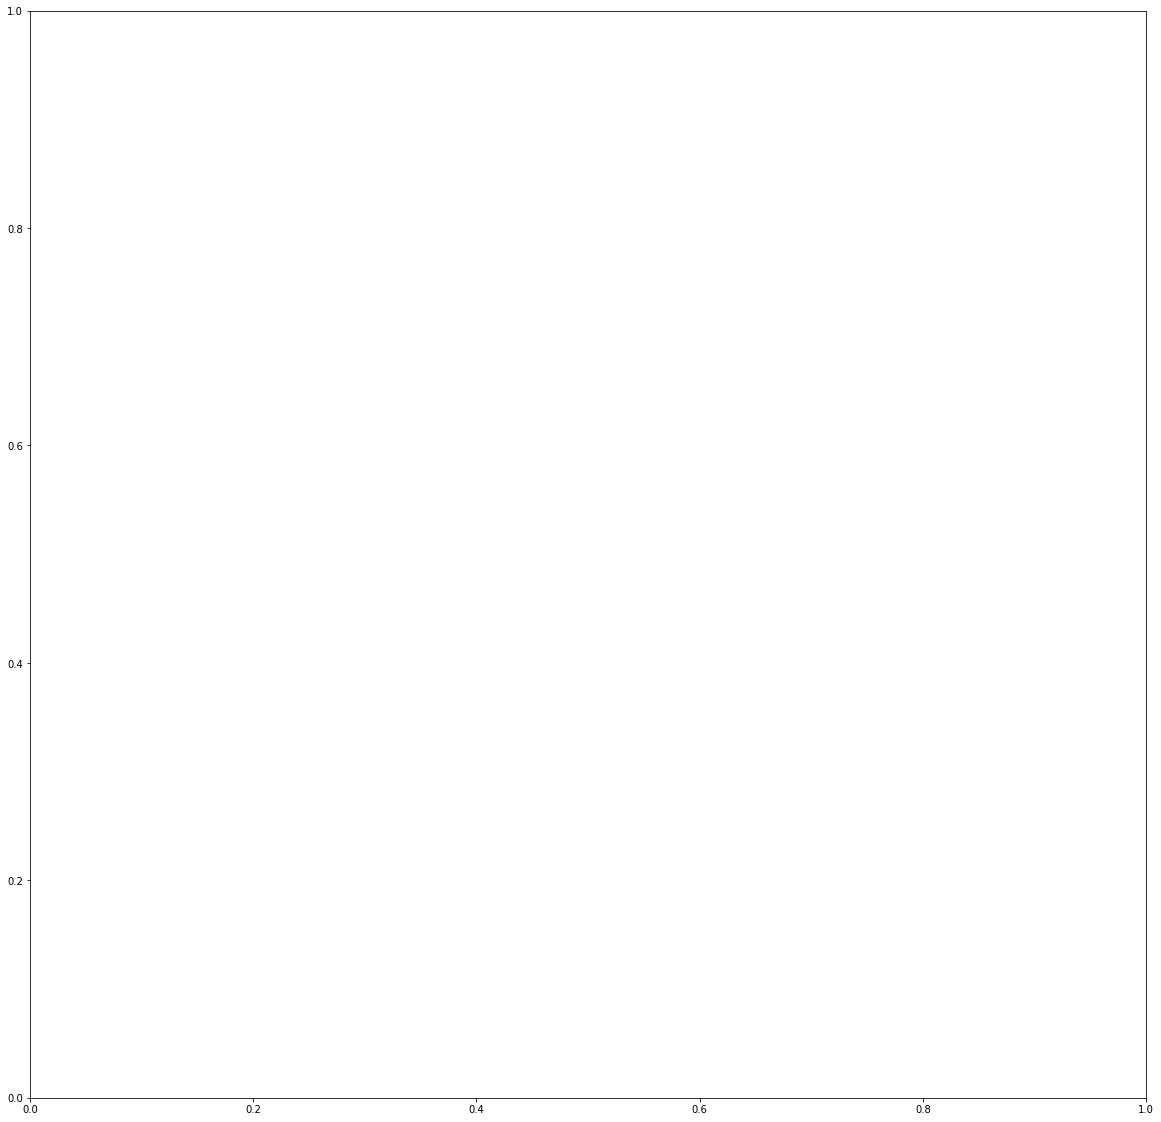

In [53]:
pl.figure(figsize=(20,20))
x=test[['budget','title']]
y=x.index

x2=test[['revenue','title']]
y2=x2.index


pl.plot(x,y)
pl.plot(x2,y2)


In [ ]:
x

In [ ]:
movie_md.release_year.value_counts(ascending=False).head(20)

In [54]:
movie_md.release_month.value_counts(ascending=False).head(20)

9     1113
10    1010
8      994
12     987
11     905
3      886
4      838
1      837
6      829
5      818
7      816
2      744
Name: release_month, dtype: int64

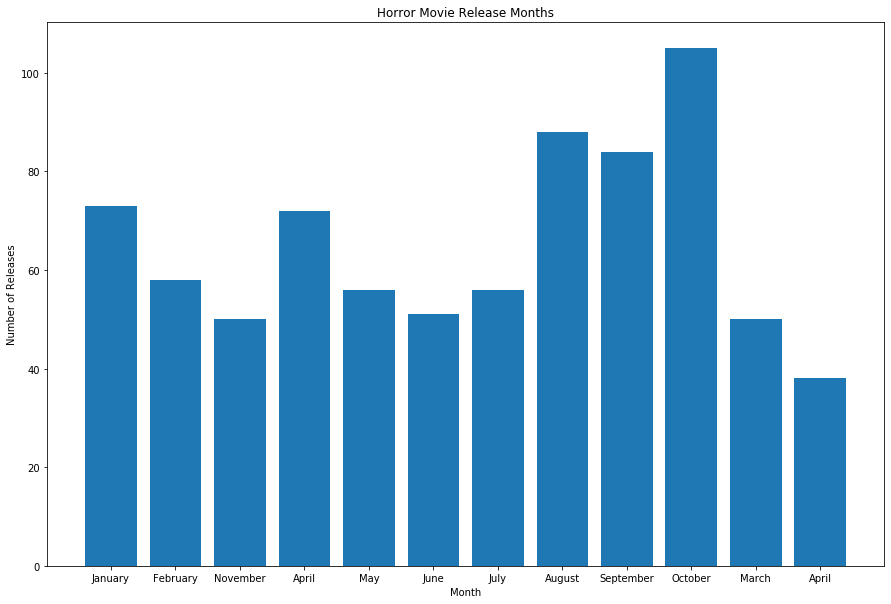

In [94]:
horror=namefind('Horror','genres')
pl.figure(figsize=(15,10))
y=horror.release_month.value_counts(ascending=False).head(20)
x=y.index

pl.bar(x,y)
pl.title('Horror Movie Release Months')
pl.ylabel('Number of Releases')
pl.xlabel('Month')

pl.xticks(ticks=x,labels=['October','August','September','January','April','February','July','May','June','March','November','April','December'])
pl.show()